# Semantic Textual Similarity

Authors: Adrián Tormos Llorente and Ferran Agulló López

In [12]:
# imports
from auxiliary_code.file_methods import load_train_data, load_test_data
from auxiliary_code.preprocessing_steps import Preprocessing
from auxiliary_code.other_methods import pretty_print_sentence
from auxiliary_code.sentence_similarity_metrics import SentenceSimilarity
from auxiliary_code.aggregation_methods import run_aggregation_method
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

## Load data

In [2]:
train_sentence_pairs, train_labels = load_train_data()
test_sentence_pairs, test_labels = load_test_data()

print('Train values length:', len(train_sentence_pairs), '; Train labels length:', len(train_labels))
print('Test values length:', len(test_sentence_pairs), '; Test labels length:', len(test_labels))

Train values length: 2234 ; Train labels length: 2234
Test values length: 3108 ; Test labels length: 3108


## Description of the approach

In [3]:
config = {
    'preprocessing_steps': [{'name': 'lower_case'},
                            {'name': 'word_tokenize'},
                            {'name': 'punctuation_removal'},
                            {'name': 'pos_tagging'},
                            {'name': 'lemmatization'}],
    'similarity_metrics': [{'name': 'jaccard_similarity'}],
    'aggregation': {'name': 'mean'}
}

### Preprocessing

In [4]:
preprocessing = Preprocessing(config['preprocessing_steps'])
train_output = preprocessing.do_pipeline(train_sentence_pairs)
test_output = preprocessing.do_pipeline(test_sentence_pairs)

We show some sentences:

In [5]:
print('\nSentence 1')
pretty_print_sentence(train_output[0][0])
print('\nSentence 2')
pretty_print_sentence(train_output[0][1])


Sentence 1
Original sentence: But other sources close to the sale said Vivendi was keeping the door open to further bids and hoped to see bidders interested in individual assets team up.
Sentence transformation: but other sources close to the sale said vivendi was keeping the door open to further bids and hoped to see bidders interested in individual assets team up.
Tokens: ['but', 'other', 'source', 'close', 'to', 'the', 'sale', 'say', 'vivendi', 'be', 'keep', 'the', 'door', 'open', 'to', 'further', 'bid', 'and', 'hop', 'to', 'see', 'bidder', 'interested', 'in', 'individual', 'asset', 'team', 'up']
Pos tags: ['CC', 'JJ', 'NNS', 'RB', 'TO', 'DT', 'NN', 'VBD', 'NN', 'VBD', 'VBG', 'DT', 'NN', 'JJ', 'TO', 'JJ', 'NNS', 'CC', 'VBD', 'TO', 'VB', 'NNS', 'JJ', 'IN', 'JJ', 'NNS', 'VBP', 'RP']

Sentence 2
Original sentence: But other sources close to the sale said Vivendi was keeping the door open for further bids in the next day or two.
Sentence transformation: but other sources close to the s

### Post processing

meh

### Similarity

In [6]:
sentence_similarity = SentenceSimilarity(config['similarity_metrics'])
train_results = sentence_similarity.compute_pair_comparison(train_output)
test_results = sentence_similarity.compute_pair_comparison(test_output)

In [7]:
print('Train results')
print(train_results)
print('\nTest results')
print(test_results)

Train results
[[0.53333333]
 [0.38888889]
 [0.33333333]
 ...
 [1.        ]
 [0.55555556]
 [0.375     ]]

Test results
[[0.33333333]
 [0.28      ]
 [0.47826087]
 ...
 [0.06666667]
 [0.3       ]
 [0.46153846]]


### Aggregation method

In [8]:
train_results = run_aggregation_method(config['aggregation'], train_results)
test_results = run_aggregation_method(config['aggregation'], test_results)

In [9]:
print('Train results')
print(train_results)
print('\nTest results')
print(test_results)

Train results
[0.53333333 0.38888889 0.33333333 ... 1.         0.55555556 0.375     ]

Test results
[0.33333333 0.28       0.47826087 ... 0.06666667 0.3        0.46153846]


## Correlation with the gold standard

Now we do the Pearson correlation with the gold standard for the two sets

In [13]:
def show_scatter_plot(labels, results, title):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.scatter(labels, results)
    ax.set_xlabel('Gold standard')
    ax.set_ylabel('Jaccard similarity')
    ax.set_title(title)
    plt.show()

In [14]:
print('Train results')
print(pearsonr(train_labels, train_results)[0])
print('\nTest results')
print(pearsonr(test_labels, test_results)[0])

Train results
0.5206513031328034

Test results
0.49301302610831793


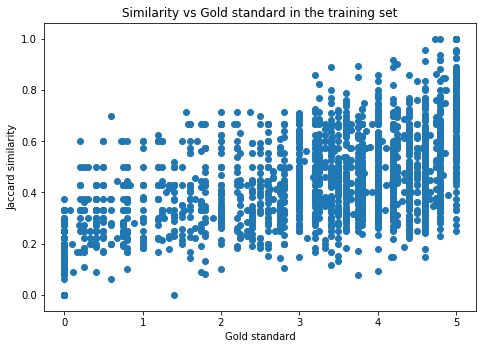

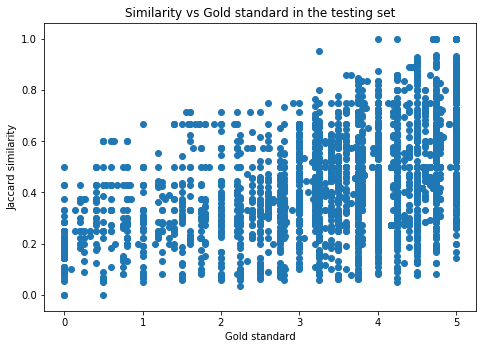

In [15]:
show_scatter_plot(train_labels, train_results, 'Similarity vs Gold standard in the training set')
show_scatter_plot(test_labels, test_results, 'Similarity vs Gold standard in the testing set')